# Exercise Solution Examplee: Fashion MNIST

## Preamble

In [3]:
import matplotlib.pyplot as plt
import numpy

In [4]:
import tensorflow
from tensorflow import keras

In [5]:
import seaborn
seaborn.set_style("whitegrid")

##  The Dataset

In [6]:
(X_train, y_train),(X_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
class_label = dict(zip(range(10), class_names))

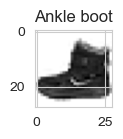

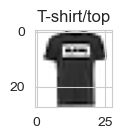

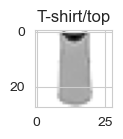

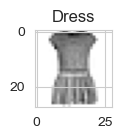

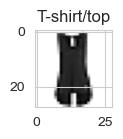

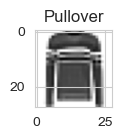

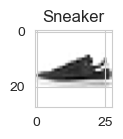

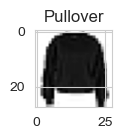

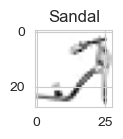

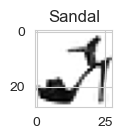

In [9]:
for i in range(10):
    plt.figure(figsize=(1,1))
    plt.imshow(X_train[i], cmap="binary")
    plt.title(class_label[y_train[i]])

## Exercise A: Your Network here

**Build, train and evaluate a neural network that is able to classify these images.**

### Preprocessing

An essential preprocessing step is to scale the pixel data to $[0,1]$:

In [10]:
X_train, X_test = X_train / 255.0, X_test / 255.0


### Network

In [11]:
net = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
net.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
net.fit(X_train, y_train, epochs=10)


Epoch 1/10


2022-11-16 14:35:22.191261: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 1ms/step - loss: 0.5697 - accuracy: 0.7991
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4073 - accuracy: 0.8538
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3668 - accuracy: 0.8662
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3398 - accuracy: 0.8768
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3207 - accuracy: 0.8816
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3087 - accuracy: 0.8877
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2946 - accuracy: 0.8919
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2841 - accuracy: 0.8952
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2728 - accuracy: 0.8985
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2638 - accurac

In [14]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 256)                 200960    
                                                                 
 dense_1 (Dense)             (32, 32)                  8224      
                                                                 
 dropout (Dropout)           (32, 32)                  0         
                                                                 
 dense_2 (Dense)             (32, 10)                  330       
                                                                 
Total params: 209,514
Trainable params: 209,514
Non-trainable params: 0
_________________________________________________________________


In [15]:
net.evaluate(X_test, y_test)


313/313 [==============================] - 0s 592us/step - loss: 0.3417 - accuracy: 0.8817


[0.3417357802391052, 0.8816999793052673]

In [16]:
y_pred = numpy.argmax(net.predict(X_test), axis=1)

313/313 [==============================] - 0s 875us/step


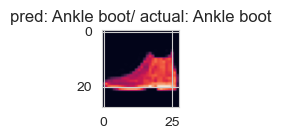

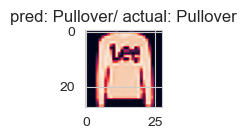

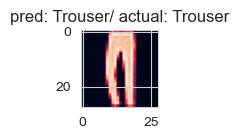

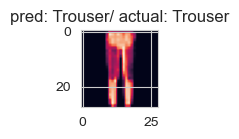

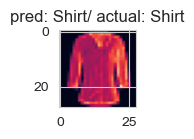

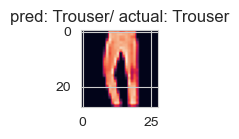

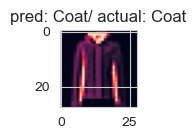

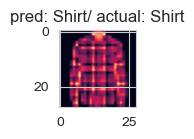

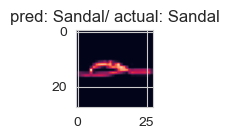

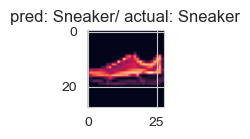

In [17]:
for i in range(10):
    plt.figure(figsize=(1,1))
    plt.imshow(X_test[i])
    plt.title(f"pred: {class_names[y_pred[i]]}/ actual: {class_names[y_test[i]]}")

---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2018-2022 [Point 8 GmbH](https://point-8.de)_